# Problem 5

Determine the distribution of the maximum displacement $r_{max}$ of a walker moving randomly within the occupied sites of a square percolation lattice of size $20 \times 20$. For a particular walk, described by the positions $r(t_1), r(t_2), \dots, r(t_N)$, this maximum displacement is given by:

$$
r_{max} := \max_{i, j \neq i} \left( | r(t_j) - r(t_i) | \right)
$$

where $t_i$ and $t_j$ represent all possible time instances such that $t_i \neq t_j$.

Plot the mean value of $r_{max}$ versus the occupation probability $p$ of each site.

To calculate the distribution of $r_{max}$, consider many independent realizations of random walks of exactly $N$ steps each, where each walk starts from a randomly chosen occupied site.

Consider **non-periodic boundary conditions**, such that upon reaching a boundary, the walker ignores neighboring sites that fall outside the lattice.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.ndimage import label


In [63]:
# Parameters
L = 20
walk_steps = 500
nwalks = 5000


In [64]:
def get_valid_neighbors(pos, M):
    
    x, y = pos
    candidates = [
        (x-1, y), (x+1, y), 
        (x, y-1), (x, y+1)    # fist part Up and Down, seconf part left Right
    ]  
    valid = []
    for nx, ny in candidates:
        if 0 <= nx < L and 0 <= ny < L and M[nx, ny]:
            valid.append((nx, ny))
    return valid

  


In [65]:
def simulation_ramdon_walks(M):
    # Find all occupied sites
    occuped_indices = np.argwhere(M)
    if len(occuped_indices)==0:
        return 0 # No occupied sites, return 0 displacement
    # Now we choose the starting    
    idx = np.random.randint(len(occuped_indices))
    start_pos = tuple(occuped_indices[idx])
    # Make it walk!
    current_pos = start_pos
    trajectory = [current_pos]
    for _ in range(walk_steps):
        neighbors = get_valid_neighbors(current_pos, M)
        if neighbors:
            current_pos = neighbors[np.random.randint(len(neighbors))]
            trajectory.append(current_pos)
        else:
            trajectory.append(current_pos)  # Stay in place if no valid moves
#Now we calculate r_max using pdist, pdist calculates pairwise distances between points and returns the max
    
    if len(trajectory) > 1:
        # Here we used dests
        dists = pdist(trajectory, metric='euclidean')
        return np.max(dists)
    return  0
    
    


In [66]:
def check_percolation(M):
    # we check if exist cluster
    labeled_array, _  = label(M)
    top_row = labeled_array[0, :]
    bottom_row = labeled_array[-1, :]
    commom = np.intersect1d(top_row[top_row > 0], bottom_row[bottom_row > 0])
    return len(commom) > 0


In [67]:
def calculation_threshold_percolation(L, trials=500): # we calculate the percolation threshold

    print("Calculating percolation threshold...")
    p_range = np.linspace(0.4, 0.8, 40)
    per_prob = []
    
    
    for i, p in enumerate(p_range):
        # Barra de carga simple para el cálculo del umbral
        print(f"Calculating Threshold: {int((i/len(p_range))*100)}%", end='\r')
        
        count = 0
        for _ in range(trials):
            M = np.random.rand(L, L) < p
            if check_percolation(M):
                count += 1
        per_prob.append(count / trials) 

   
    p_c_estimated = np.interp(0.5, per_prob, p_range)
    print(f"Estimated percolation threshold p_c: {p_c_estimated:.4f}") 
    return p_c_estimated



In [68]:
# Simulation
calculated_pc = calculation_threshold_percolation(L)
probs = np.linspace(0.45, 0.90, 20) 
mean_rmax_list = []
print(f"Starting simulations... L={L}, Steps ={walk_steps}....")
total_steps = len(probs)


Calculating percolation threshold...
Estimated percolation threshold p_c: 0.5913      
Starting simulations... L=20, Steps =500....


In [69]:
for p_idx, p in enumerate(probs):
    rmax_values = []
  
    for _ in range(nwalks):
        # Generate percolation lattice
        M = np.random.rand(L, L) < p
        r_max = simulation_ramdon_walks(M)
        rmax_values.append(r_max)
    
    mean_rmax = np.mean(rmax_values)
    mean_rmax_list.append(mean_rmax)
    print(f"p={p:.4f}, Mean r_max={mean_rmax:.4f}")
print(f"Theoretical = 0.5927, Resul={calculated_pc:.4f} " )
print("\nSimulation finish! Generating plot...")

p=0.4500, Mean r_max=5.0310
p=0.4737, Mean r_max=5.8682
p=0.4974, Mean r_max=6.8081
p=0.5211, Mean r_max=7.6495
p=0.5447, Mean r_max=8.5909
p=0.5684, Mean r_max=9.6669
p=0.5921, Mean r_max=10.9068
p=0.6158, Mean r_max=11.9283
p=0.6395, Mean r_max=12.9307
p=0.6632, Mean r_max=14.0616
p=0.6868, Mean r_max=14.9310
p=0.7105, Mean r_max=15.8695
p=0.7342, Mean r_max=16.6234
p=0.7579, Mean r_max=17.2883
p=0.7816, Mean r_max=17.8074
p=0.8053, Mean r_max=18.3709
p=0.8289, Mean r_max=18.7967
p=0.8526, Mean r_max=19.1295
p=0.8763, Mean r_max=19.5153
p=0.9000, Mean r_max=19.7481
Theoretical = 0.5927, Resul=0.5913214990138067 

Simulation finish! Generating plot...


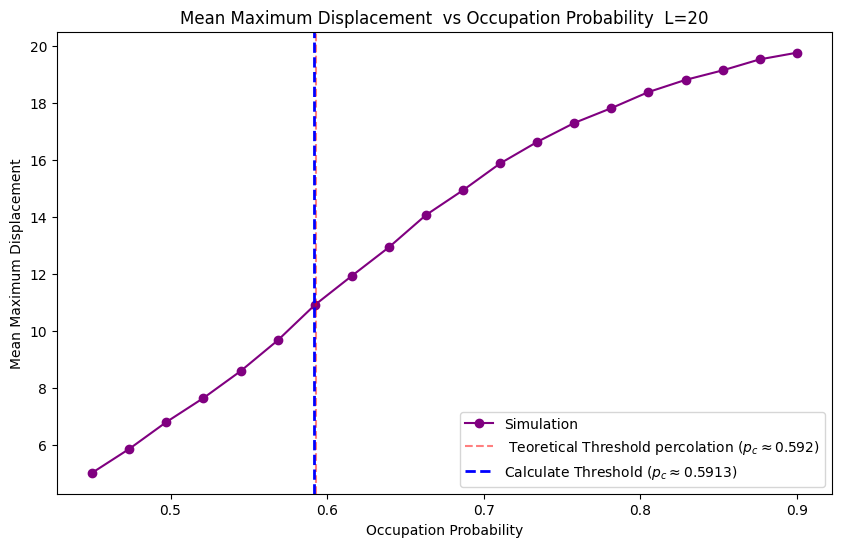

In [77]:
#Now Plot!
plt.figure(figsize=(10, 6))
plt.plot(probs, mean_rmax_list, marker='o', color='purple', label = 'Simulation')
plt.title(f'Mean Maximum Displacement  vs Occupation Probability  L={L}')
plt.xlabel('Occupation Probability')
plt.ylabel('Mean Maximum Displacement')
plt.axvline(x=0.5927, color='r', linestyle='--', alpha=0.5, label=f' Teoretical Threshold percolation ($p_c\\approx 0.592$)')
plt.axvline(x=calculated_pc, color='blue', linestyle='--', linewidth=2, 
            label=f'Calculate Threshold ($p_c \\approx {calculated_pc:.4f}$)')
plt.legend()
plt.show()

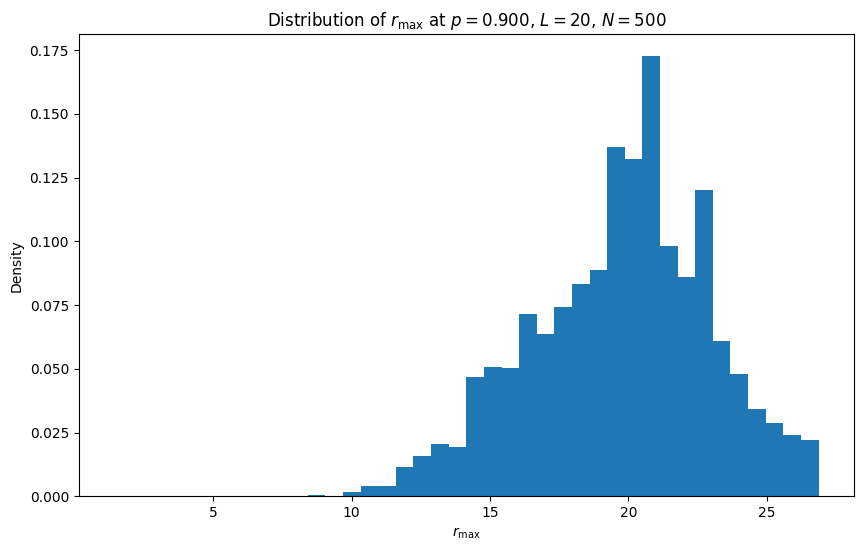

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(rmax_values, bins=40, density=True)
plt.xlabel(r"$r_{\max}$")
plt.ylabel("Density")
plt.title(fr"Distribution of $r_{{\max}}$ at $p={p:.3f}$, $L={L}$, $N={walk_steps}$")
plt.show()
